In [3]:
# Import Libraries

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# Reading Data

In [12]:
wells = pd.read_excel('UT Completion and Sequencing.xlsx')

In [468]:
wells.head()

,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",...,Best3 Mo BOPD,Best6 Mo BOPD,Best9 Mo BOPD,Best12 Mo BOPD,Compl. Type,Latitude,Longitude,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod
0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,16079.0,...,127.690116,110.009862,97.351888,88.275258,No Data,47.051150,-103.214580,NaN,660.0,33.55
1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,7269.0,...,127.832566,99.128863,83.694938,72.019505,No Data,47.111368,-103.225059,NaN,660.0,27.62
2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,8279.0,...,44.334867,36.905545,31.766382,28.566732,OH,47.097032,-103.160910,NaN,660.0,11.19
3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,9342.0,...,120.764848,99.172693,86.675433,75.882095,No Data,47.140248,-103.178391,NaN,660.0,27.85
4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,4523.0,...,227.580539,189.869603,163.163854,140.033969,OH,47.080872,-103.181300,NaN,660.0,50.88


### Data Cleaning & Preprocessing

In [13]:
# Converting the completion type values to 'Mixed' if they contain more than 1 completion type
counter = 0
for value in wells['Compl. Type']:
    if type(value) != float and value[0] in '1234567890':
        wells.loc[counter,'Compl. Type'] = 'Mixed'
    counter += 1

wells['Compl. Type'].replace(['P & P (cmt.)', 'P & P (After sleeves mill out)', 'P & P (After milling out sleeves)'], 'P & P', inplace=True)
wells['Compl. Type'].replace('Sleeves and P & P', 'Mixed', inplace=True)
wells['Compl. Type'].replace('Sleeves (cmt.)', 'Sleeves', inplace=True)
wells['Compl. Type'].replace(['Cemented Liner', 'Screen', 'Perforated Liner'], 'Liner', inplace=True)
wells['Compl. Type'].replace(['CT', 'Coil Tubing Frac'], 'Coiled Tubing', inplace=True)
wells['Compl. Type'].replace(['unknown, probably hybrid', 'Not indicated', 'Frac Ports', 'Frac ports'], 'No Data', inplace=True)
wells['Compl. Type'].value_counts()

P & P            4845
Sleeves          4250
OH                687
No Data           575
Mixed             373
Liner              22
Coiled Tubing      14
Name: Compl. Type, dtype: int64

In [14]:
# One-hot encoding for categorical data

# Formation
wells['Formation'].replace('TF1', 'TFH', inplace=True)
wells['Formation'].replace(['UTFH', 'MTFH', 'TFSH', 'TF4', 'TF2.5'], 'Other', inplace=True)
#wells['Formation'].value_counts()

formation = pd.get_dummies(wells['Formation'], prefix = 'FORM', dtype = np.float64)
wells = pd.concat([wells, formation], axis=1)
wells.drop(['Formation'], axis=1, inplace=True)
wells.head()

# Completion Type
completions_type = pd.get_dummies(wells['Compl. Type'], prefix = 'COMP', dtype = np.float64)
wells = pd.concat([wells, completions_type], axis=1)
wells.drop(['Compl. Type'], axis=1, inplace=True)
wells.head()

,Operator,Well Name,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Date Fracd,...,FORM_TF2,FORM_TF3,FORM_TFH,COMP_Coiled Tubing,COMP_Liner,COMP_Mixed,COMP_No Data,COMP_OH,COMP_P & P,COMP_Sleeves
0,Operator 1,Well 1,5114.0,30.0,141,99,10,0.0,16079.0,2006-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Operator 2,Well 2,5181.0,NaN,142,99,16,418000.0,7269.0,2005-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Operator 2,Well 3,4780.0,15.0,142,99,24,568407.0,8279.0,2006-10-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Operator 1,Well 4,10654.0,1.0,142,99,1,845000.0,9342.0,2007-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Operator 2,Well 5,5209.0,1.0,142,99,35,297366.0,4523.0,2006-09-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
# Drop Unused Columns
wells.drop(['Date Fracd','Operator', 'Well Name', 'Township ', 'Range', 'Section', 'Best1 Mo BOPD', 'Best3 Mo BOPD', 'Best6 Mo BOPD', 'Best9 Mo BOPD', 'Best12 Mo BOPD', 'Fluid Type from DI'], axis=1, inplace=True)
wells.head()

,Lateral Length,Stages,"Total Prop, lbs","Fluid, bbls",Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,FORM_MBH,FORM_MBH/TFH,...,FORM_TF2,FORM_TF3,FORM_TFH,COMP_Coiled Tubing,COMP_Liner,COMP_Mixed,COMP_No Data,COMP_OH,COMP_P & P,COMP_Sleeves
0,5114.0,30.0,0.0,16079.0,47.051150,-103.214580,660.0,33.55,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5181.0,NaN,418000.0,7269.0,47.111368,-103.225059,660.0,27.62,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4780.0,15.0,568407.0,8279.0,47.097032,-103.160910,660.0,11.19,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10654.0,1.0,845000.0,9342.0,47.140248,-103.178391,660.0,27.85,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5209.0,1.0,297366.0,4523.0,47.080872,-103.181300,660.0,50.88,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
# Filter out NaN and Vertical Wells
wells.dropna(inplace = True)
wells = wells[wells['Stages'] != 1.0]
wells = wells[(wells.loc[:,'Lateral Length':'12 month Cum Prod'] != 0).all(1)]

### Plotting

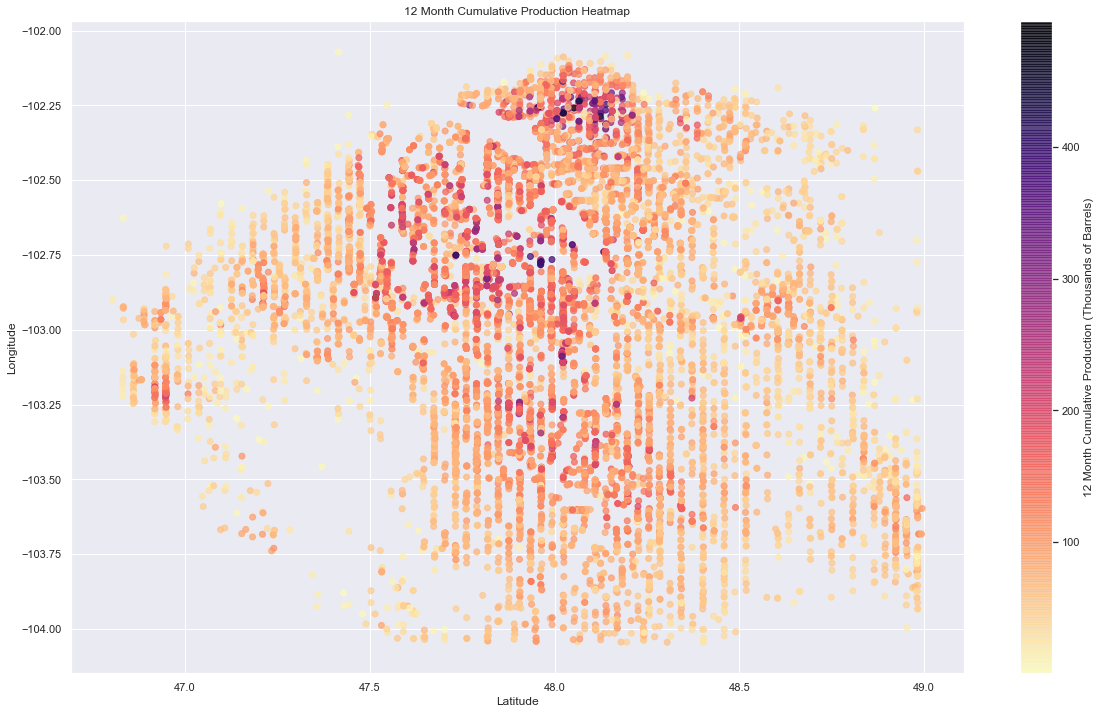

In [11]:
# Heatmap
import seaborn as sns
sns.set()
plt.figure(figsize=(20, 12))
latitude = wells['Latitude']
longitude = wells['Longitude']
production = wells['12 month Cum Prod']

plt.scatter(latitude, longitude, c=production, cmap='magma_r', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('12 Month Cumulative Production (Thousands of Barrels)')

plt.title('12 Month Cumulative Production Heatmap')
plt.xlabel('Latitude')
plt.ylabel('Longitude');

In [12]:
#Installing an older version to avoid a common glitch in newer versions of matplotlib
!pip install matplotlib==3.0.3

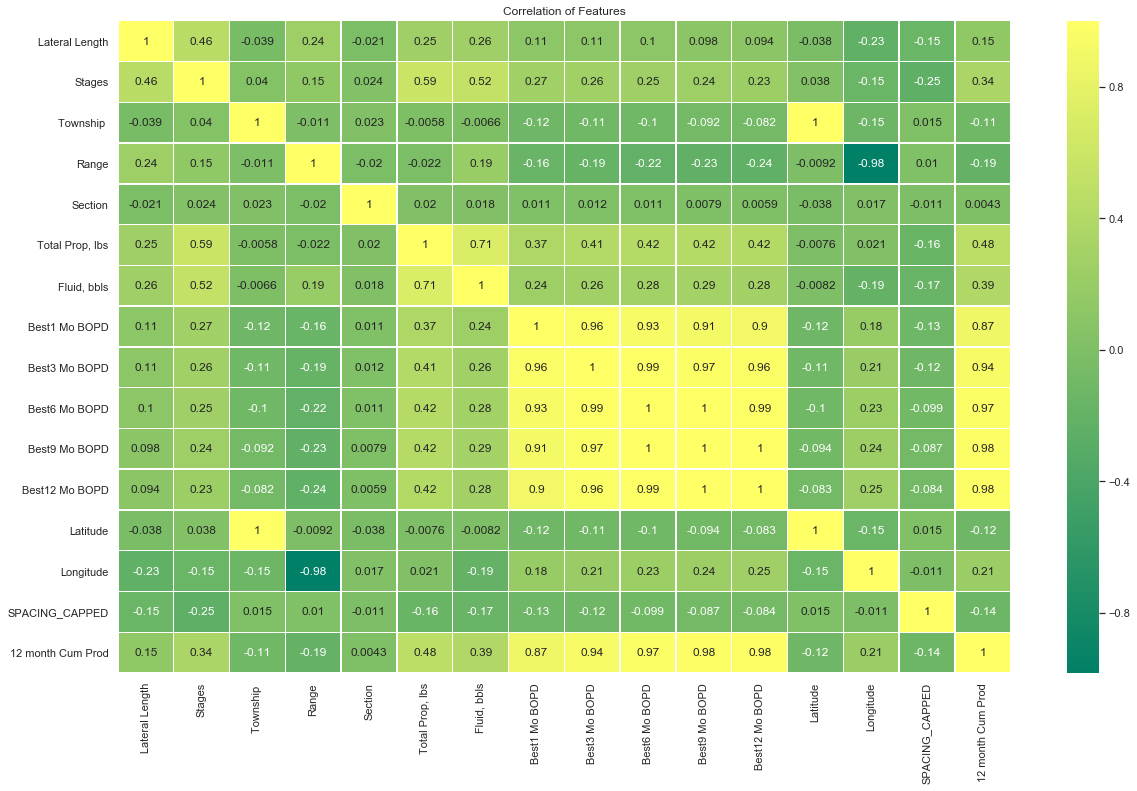

In [13]:
# Correlation Matrix
correlations = pd.read_excel('UT Completion and Sequencing.xlsx')
plt.figure(figsize = (20, 12))
sns.heatmap(correlations.drop(labels = ['Operator', 'Well Name', 'Formation', 'Date Fracd', 'Compl. Type', 'Fluid Type from DI'], axis = 1).corr(), cmap = 'summer', annot = True, linewidths = .5)
plt.title("Correlation of Features");

In [472]:
# IQR For Production Thresholds

In [17]:
IQR = pd.read_excel('UT Completion and Sequencing.xlsx')
IQR.drop(['Operator', 'Well Name', 'Formation', 'Lateral Length', 'Stages', 'Township ', 'Range', 'Section', 'Total Prop, lbs', 'Fluid, bbls', 'Date Fracd', 'Compl. Type', 'Latitude', 'Longitude', 'Fluid Type from DI', 'SPACING_CAPPED'], axis=1, inplace=True)
IQR.head()

,Best1 Mo BOPD,Best3 Mo BOPD,Best6 Mo BOPD,Best9 Mo BOPD,Best12 Mo BOPD,12 month Cum Prod
0,141.518738,127.690116,110.009862,97.351888,88.275258,33.55
1,197.764629,127.832566,99.128863,83.694938,72.019505,27.62
2,52.071006,44.334867,36.905545,31.766382,28.566732,11.19
3,136.752137,120.764848,99.172693,86.675433,75.882095,27.85
4,249.178172,227.580539,189.869603,163.163854,140.033969,50.88


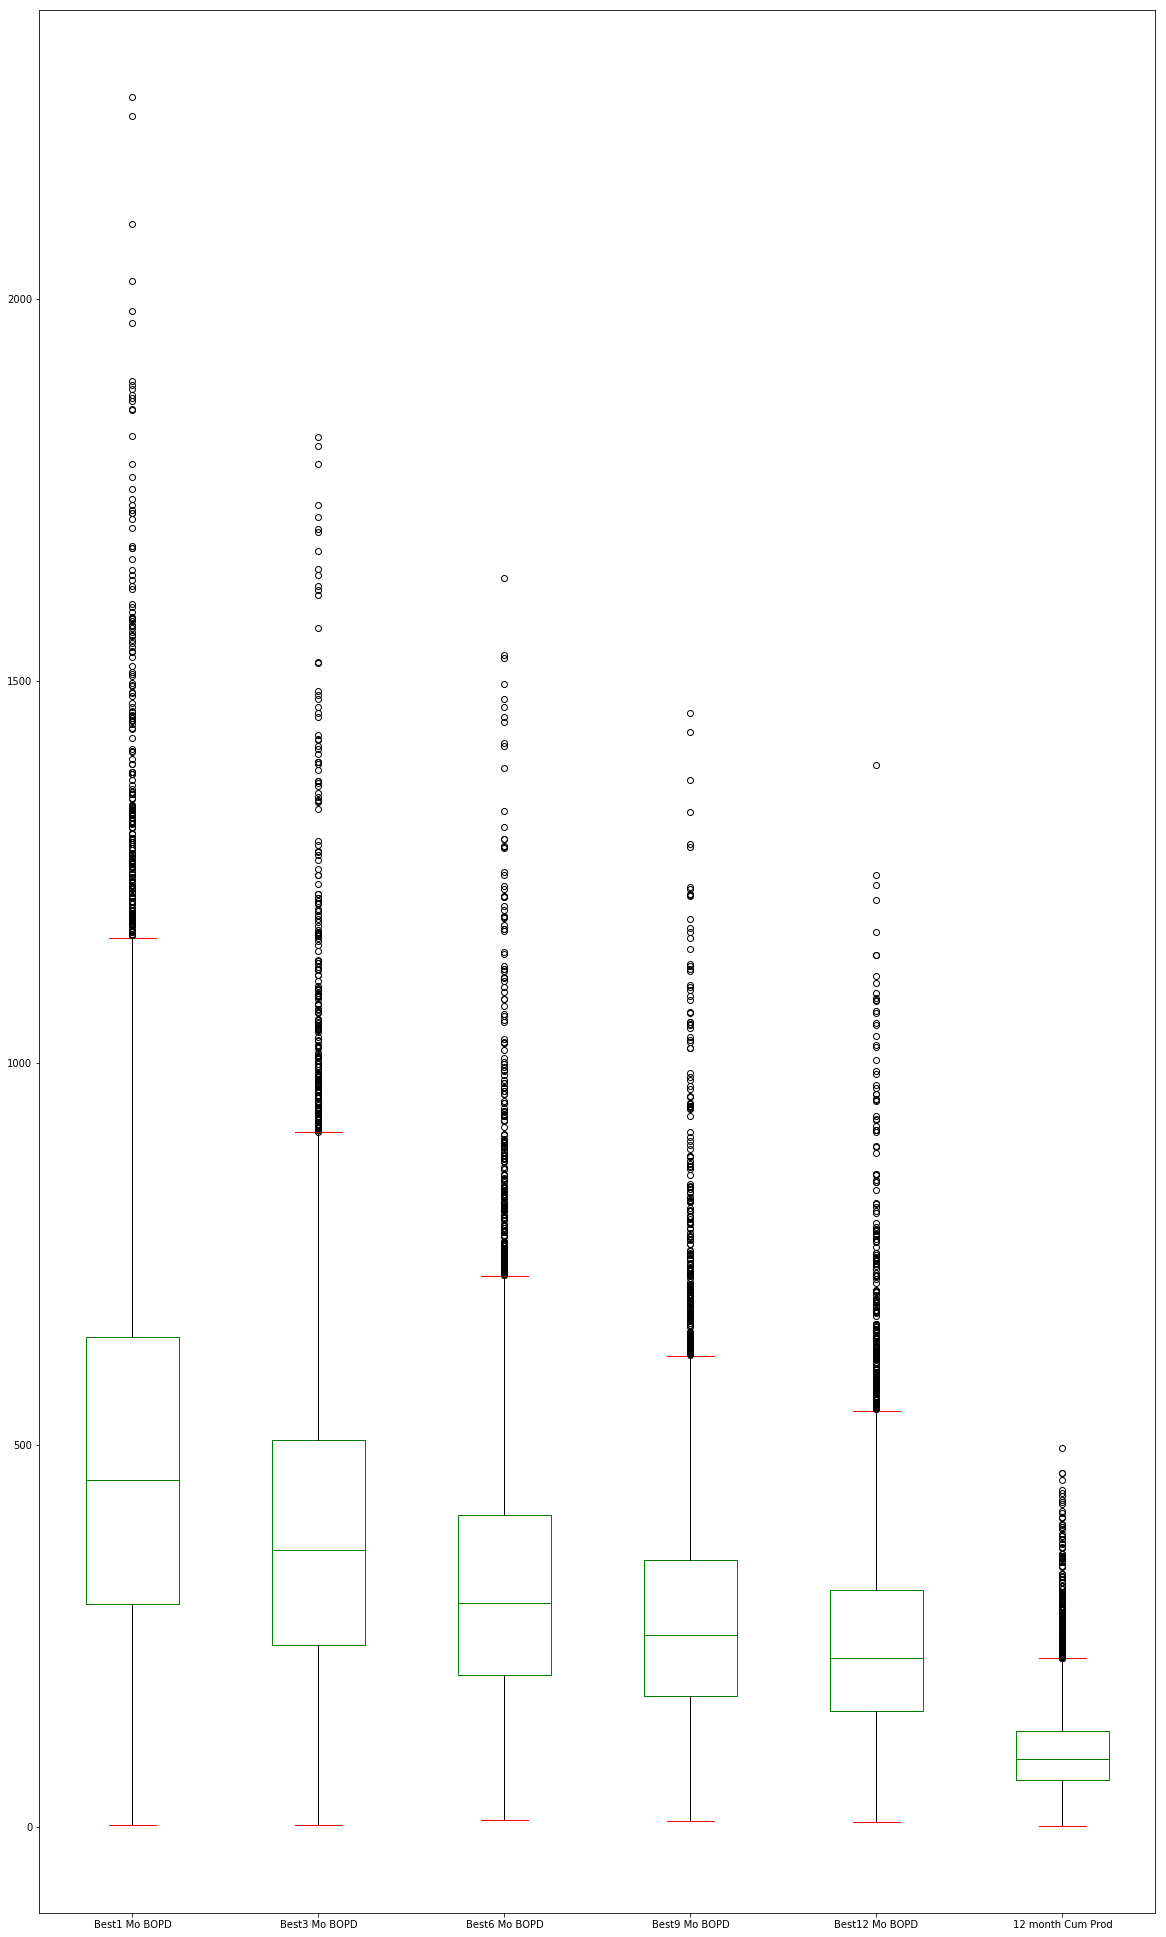

In [18]:
boxplot = IQR.plot.box(figsize=(20, 35), color = {'whiskers':'black','caps':'red','medians':'green','boxes':'green'})

In [3]:
IQR.describe()

NameError: name 'IQR' is not defined

In [ ]:
IQR.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

In [ ]:
# _, bp = pd.DataFrame.boxplot(IQR, return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

### Modeling

In [535]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

To preserve the integrity of our personal machines, we ran the following model code on a more powerful computer.

In [619]:
scalerFeatures_rfr = MinMaxScaler((0, 1))
scalerLabel_rfr = MinMaxScaler((0, 1))
rfr = RandomForestRegressor(random_state = 42)
pipeline_rfr = Pipeline(steps = [('scaler', scaler), ('model', rfr)])

params_rfr = {'model__n_estimators':[10, 25, 50, 75, 100], 'model__max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

GSCV = GridSearchCV(pipeline_rfr, params_rfr, cv = 3)
featuresHPT_rfr = wells[wells['12 month Cum Prod'] <= 180].drop('12 month Cum Prod', axis = 1, inplace = False)
labelHPT_rfr = wells[wells['12 month Cum Prod'] <= 180]['12 month Cum Prod']
featuresScaledHPT_rfr = scalerFeatures_rfr.fit_transform(featuresHPT_rfr)
labelScaledHPT_rfr = scalerLabel_rfr.fit_transform(labelHPT_rfr.values.reshape(-1, 1))
GSCV.fit(featuresScaledHPT_rfr, labelScaledHPT_rfr)
best_params = GSCV.best_params_
print(best_params)

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


{'model__max_depth': 40, 'model__n_estimators': 100}


In [609]:
scalerFeatures_gbr = MinMaxScaler((0, 1))
scalerLabel_gbr = MinMaxScaler((0, 1))
gbr = GradientBoostingRegressor(random_state = 42)
pipeline_gbr = Pipeline(steps = [('scaler', scaler), ('model', gbr)])

params_gbr = {'model__n_estimators':[100, 250, 500, 750, 1000], 'model__max_depth':[2, 4, 6, 8, 10]}

GSCV = GridSearchCV(pipeline_gbr, params_gbr, cv = 3)
featuresHPT_gbr = wells[wells['12 month Cum Prod'] > 180].drop('12 month Cum Prod', axis = 1, inplace = False)
labelHPT_gbr = wells[wells['12 month Cum Prod'] > 180]['12 month Cum Prod']
featuresScaledHPT_gbr = scalerFeatures_gbr.fit_transform(featuresHPT_gbr)
labelScaledHPT_gbr = scalerLabel_gbr.fit_transform(labelHPT_gbr.values.reshape(-1, 1))
GSCV.fit(featuresScaledHPT_gbr, labelScaledHPT_gbr)
best_params = GSCV.best_params_
print(best_params)

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

{'model__max_depth': 4, 'model__n_estimators': 100}


/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
#Output

print("{'model__activation': 'relu'}, 'model__alpha': .050100000000000006, 'model__solver': 'adam'}")

{'model__activation': 'relu'}, 'model__alpha': .050100000000000006, 'model__solver': 'adam'}


In [647]:
scalerFeatures_mlp = MinMaxScaler((0, 1))
scalerLabel_mlp = MinMaxScaler((0, 1))
features_mlp = wells.drop(['12 month Cum Prod'], axis = 1, inplace = False)
label_mlp = wells['12 month Cum Prod']

featuresScaled_mlp = scalerFeatures_mlp.fit_transform(features_mlp)
labelScaled_mlp = scalerLabel_mlp.fit_transform(label_mlp.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(featuresScaled_mlp, labelScaled_mlp, random_state = 42, train_size = .9)

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [648]:
mlp = MLPRegressor(random_state = 42, max_iter = 200, verbose = True, activation = 'relu', alpha = .0501, 
                   solver = 'adam')
mlp.fit(X_train, y_train)

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.00957170
Iteration 2, loss = 0.00719407
Iteration 3, loss = 0.00640090
Iteration 4, loss = 0.00593713
Iteration 5, loss = 0.00559791
Iteration 6, loss = 0.00533228
Iteration 7, loss = 0.00510684
Iteration 8, loss = 0.00493450
Iteration 9, loss = 0.00478474
Iteration 10, loss = 0.00467921
Iteration 11, loss = 0.00456696
Iteration 12, loss = 0.00449573
Iteration 13, loss = 0.00442186
Iteration 14, loss = 0.00437227
Iteration 15, loss = 0.00431674
Iteration 16, loss = 0.00424147
Iteration 17, loss = 0.00421423
Iteration 18, loss = 0.00418062
Iteration 19, loss = 0.00411506
Iteration 20, loss = 0.00408028
Iteration 21, loss = 0.00404795
Iteration 22, loss = 0.00403244
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0501, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [649]:
y_pred = mlp.predict(X_test)
y_pred = scalerLabel_mlp.inverse_transform(y_pred.reshape(-1, 1))
y_test = scalerLabel_mlp.inverse_transform(y_test)
score = mean_squared_error(y_pred, y_test)
score

1670.2581127145525

Text(0, 0.5, 'Predictions')

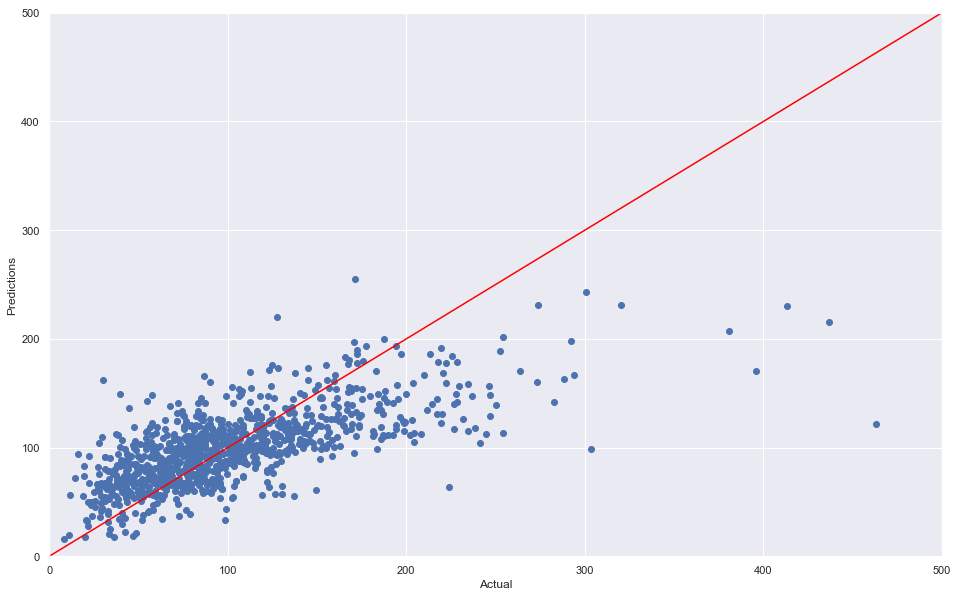

In [149]:
plt.figure(figsize = (16, 10))
plt.scatter(y_test.reshape(-1, 1), y_pred.reshape(-1, 1))
plt.plot(np.arange(0,500,0.005), np.arange(0,500,0.005), c='red')
plt.xlim(0,500)
plt.ylim(0,500)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [650]:
#wells['12 month Cum Prod'] = wells['12 month Cum Prod']/wells['Lateral Length']*1000
#print(wells.shape)
#wells.head()

In [651]:
#wells.drop(['Lateral Length'], axis=1, inplace=True)
#wells.shape

In [636]:
wellsMin = wells[wells['12 month Cum Prod'] <= 180]
wellsMax = wells[wells['12 month Cum Prod'] > 180]

In [637]:
scalerMinX = MinMaxScaler((0, 1))
scalerMaxX = MinMaxScaler((0, 1))
scalerMinY = MinMaxScaler((0, 1))
scalerMaxY = MinMaxScaler((0, 1))
featuresMin = wellsMin.drop(['12 month Cum Prod'], axis = 1, inplace = False)
featuresMax = wellsMax.drop(['12 month Cum Prod'], axis = 1, inplace = False)
labelMin = wellsMin['12 month Cum Prod']
labelMax = wellsMax['12 month Cum Prod']

featuresMinScaled = scalerMinX.fit_transform(featuresMin)
featuresMaxScaled = scalerMaxX.fit_transform(featuresMax)
labelMinScaled = scalerMinY.fit_transform(labelMin.values.reshape(-1, 1))
labelMaxScaled = scalerMaxY.fit_transform(labelMax.values.reshape(-1, 1))

minX_train, minX_test, minY_train, minY_test = train_test_split(featuresMinScaled, labelMinScaled, 
                                                                random_state = 42, train_size = .9)
maxX_train, maxX_test, maxY_train, maxY_test = train_test_split(featuresMaxScaled, labelMaxScaled, 
                                                                random_state = 42, train_size = .9)

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [638]:
#modelMin = GradientBoostingRegressor(random_state = 42, n_estimators = 100, max_depth = 20)
modelMax = GradientBoostingRegressor(random_state = 42, n_estimators = 100, max_depth = 4)
#modelMin.fit(minX_train, minY_train)
modelMax.fit(maxX_train, maxY_train)

/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [639]:
modelMin = RandomForestRegressor(random_state = 42, n_estimators = 100, max_depth = 35)
modelMin.fit(minX_train, minY_train)

/Users/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [641]:
minY_pred = modelMin.predict(minX_test)
minY_pred = scalerMinY.inverse_transform(minY_pred.reshape(-1, 1))
minY_test = scalerMinY.inverse_transform(minY_test.reshape(-1, 1))
minScore = mean_squared_error(minY_pred, minY_test)

maxY_pred = modelMax.predict(maxX_test)
maxY_pred = scalerMaxY.inverse_transform(maxY_pred.reshape(-1, 1))
maxY_test = scalerMaxY.inverse_transform(maxY_test.reshape(-1, 1))
maxScore = mean_squared_error(maxY_pred, maxY_test)

In [642]:
print("Min model RMSE:", (format(np.sqrt(minScore), "1.2f")) + ", max model RMSE:", (format(np.sqrt(maxScore), "1.2f")))

Min model RMSE: 22.51, max model RMSE: 40.23


Text(0, 0.5, 'Predictions')

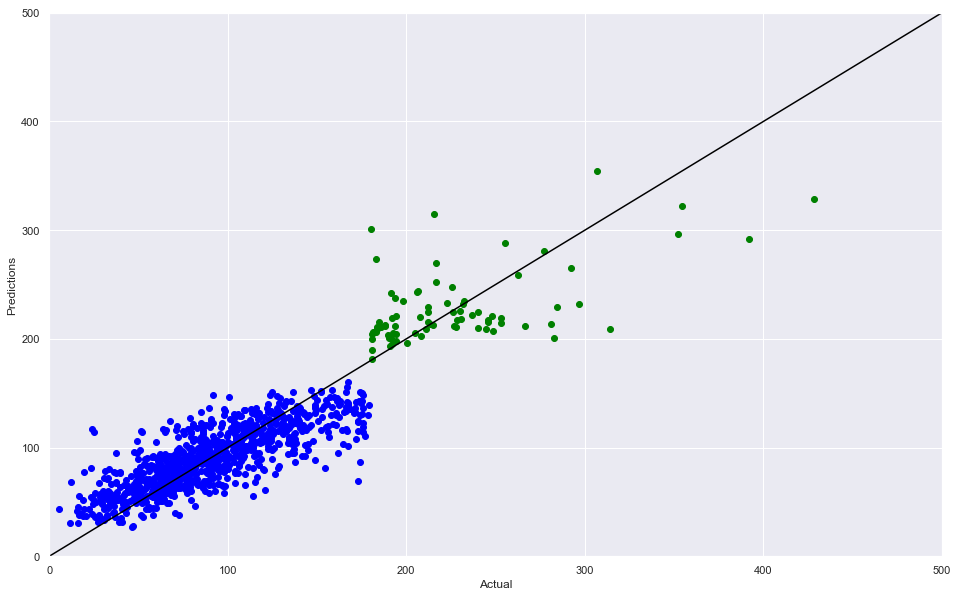

In [643]:
plt.figure(figsize = (16, 10))
plt.scatter(minY_test, minY_pred, c = 'blue', label = 'Lower Production Wells')
plt.scatter(maxY_test, maxY_pred, c = 'green', label = 'Higher Production Wells')
plt.plot(np.arange(0,500,0.005), np.arange(0,500,0.005), c='black')
plt.xlim(0,500)
plt.ylim(0,500)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [2]:
# Dashboard

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [6]:
model_type = widgets.Dropdown(
    options=[('RFR', 1), ('GBR', 2)],
    value=1,
    description='Model Type:',
    disabled=False,
    style=dict(description_width='initial')
)
stages = widgets.FloatText(
    value=0,
    description='Stages:',
    disabled=False
)
total_proppant = widgets.FloatText(
    value=0,
    description='Total Proppant:',
    disabled=False,
    style=dict(description_width='initial')
)
total_fluid = widgets.FloatText(
    value=0,
    description='Total Fluid:',
    disabled=False
)
latitude = widgets.FloatText(
    value=0,
    description='Latitude:',
    disabled=False
)
longitude = widgets.FloatText(
    value=0,
    description='Longitude:',
    disabled=False
)
well_spacing = widgets.FloatText(
    value=0,
    description='Well Spacing:',
    disabled=False
)
formation = widgets.Dropdown(
    options=[('MBH', 1), ('MBH/TFH', 2), ('TFH2', 3), ('TF3', 4), ('TF2', 5), ('Other', 6)],
    value=1,
    description='Formation:',
    disabled=False,
)
completion_type = widgets.Dropdown(
    options=[('P&P', 1), ('Sleeves', 2), ('OH', 3), ('Mixed', 4), ('Liner', 5), ('Coiled Tubing',6)],
    value=1,
    description='Completion Type:',
    disabled=False,
    style=dict(description_width='initial')
)

In [7]:
display(model_type)
display(stages)
display(total_proppant)
display(total_fluid)
display(latitude)
display(longitude)
display(well_spacing)
display(formation)
display(completion_type)

Dropdown(description='Model Type:', options=(('RFR', 1), ('GBR', 2)), style=DescriptionStyle(description_width…

FloatText(value=0.0, description='Stages:')

FloatText(value=0.0, description='Total Proppant:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Total Fluid:')

FloatText(value=0.0, description='Latitude:')

FloatText(value=0.0, description='Longitude:')

FloatText(value=0.0, description='Well Spacing:')

Dropdown(description='Formation:', options=(('MBH', 1), ('MBH/TFH', 2), ('TFH2', 3), ('TF3', 4), ('TF2', 5), (…

Dropdown(description='Completion Type:', options=(('P&P', 1), ('Sleeves', 2), ('OH', 3), ('Mixed', 4), ('Liner…

In [8]:
# Optimal Values

In [19]:
wells.head()

,Lateral Length,Stages,"Total Prop, lbs","Fluid, bbls",Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,FORM_MBH,FORM_MBH/TFH,...,FORM_TF2,FORM_TF3,FORM_TFH,COMP_Coiled Tubing,COMP_Liner,COMP_Mixed,COMP_No Data,COMP_OH,COMP_P & P,COMP_Sleeves
2,4780.0,15.0,568407.0,8279.0,47.097032,-103.160910,660.0,11.19,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21,14372.0,10.0,1076000.0,26063.0,47.082569,-103.140221,660.0,21.60,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23,14552.0,2.0,1090000.0,26063.0,47.109580,-103.262790,660.0,17.73,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25,3732.0,8.0,837400.0,13029.0,47.210427,-103.609445,660.0,46.83,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27,9196.0,4.0,733000.0,12543.0,47.096896,-103.204912,660.0,13.36,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))